# Khai báo thư viện

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
from tkinter import messagebox
from tkinter.ttk import *
from tkinter import *

# 1. Xử lý dữ liệu

In [22]:
data = pd.read_csv("./work.csv")
data

,work environment,experience,passion,at speedvancemend,salary,quit job
0,ordinary,med,small,normal,med,yes
1,ordinary,high,big,slow,low,yes
2,bad,high,vbig,fast,low,yes
3,ordinary,high,big,fast,med,no
4,ordinary,med,small,normal,high,yes
...,...,...,...,...,...,...
238,bad,med,big,normal,med,yes
239,ordinary,low,vbig,slow,high,no
240,ordinary,med,small,fast,high,yes
241,good,high,small,slow,high,yes


In [23]:
data.isnull().sum()

work environment     0
experience           0
passion              0
at speedvancemend    0
salary               0
quit job             0
dtype: int64

## 1. . Categorical data Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['work environment', 'experience', 'passion', 'at speedvancemend', 'salary']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Lưu lại từng encoder để sử dụng khi dự đoán


In [25]:
data.head()

,work environment,experience,passion,at speedvancemend,salary,quit job
0,2,2,1,1,2,yes
1,2,0,0,2,1,yes
2,0,0,2,0,1,yes
3,2,0,0,0,2,no
4,2,2,1,1,0,yes


quit job
yes    133
no     110
Name: count, dtype: int64


<Axes: xlabel='quit job', ylabel='count'>

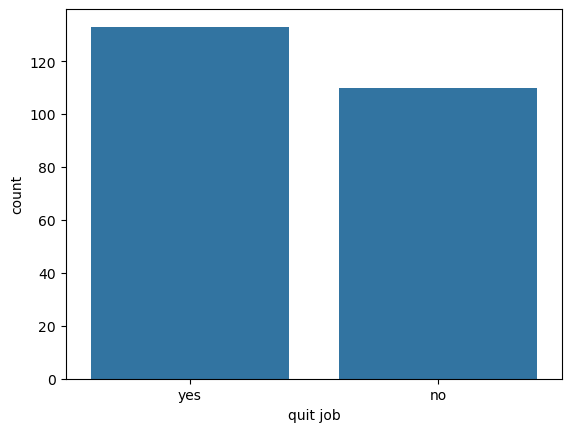

In [26]:
count=data['quit job'].value_counts()
print(count)
sns.countplot(x='quit job', data=data)

quit job
yes    133
no     133
Name: count, dtype: int64


<Axes: xlabel='quit job', ylabel='count'>

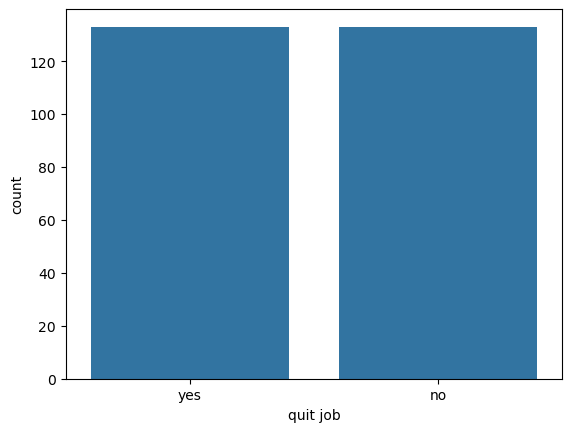

In [27]:
from imblearn.over_sampling import SMOTE

X = data.drop('quit job', axis=1)
y = data['quit job']

smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X, y)

data_update = pd.concat([pd.DataFrame(X_os, columns=X.columns), pd.Series(y_os, name='quit job')], axis=1)

count=data_update['quit job'].value_counts()
print(count)
sns.countplot(x='quit job', data=data_update)

In [28]:
X_os

,work environment,experience,passion,at speedvancemend,salary
0,2,2,1,1,2
1,2,0,0,2,1
2,0,0,2,0,1
3,2,0,0,0,2
4,2,2,1,1,0
...,...,...,...,...,...
261,0,1,0,0,0
262,1,0,2,0,0
263,1,1,0,0,2
264,0,1,0,2,0


# 2. Xây dựng mô hình

### Hàm đánh giá tỉ lệ dự đoán đúng

In [34]:
# Hàm tính toán tỷ lệ dự đoán chính xác
def RateRating(Y_Pred, Y_test):
    countPredictTrue = np.sum(Y_Pred == Y_test)  # Đếm số lần dự đoán đúng
    rate = countPredictTrue / len(Y_Pred)
    return rate

### Hàm show tỉ lệ của thuật toán CART

In [30]:
#Hàm show tỉ lệ dự đoán của thuật toán CART trên 3 độ đo: Precision, Recall, F1
def AboutRateCART():
	messagebox.showinfo("Tỉ lệ dự đoán đúng của CART",f"Accuracy score: {maxRateCART*100}%"+'\n'
													+f"Precision score: {precision_score(Y_test, bestPredCART, average='micro')*100}%"+'\n'
													+f"Recall score: {recall_score(Y_test, bestPredCART, average='micro')*100}%"+'\n'
													+f"F1 score: {f1_score(Y_test, bestPredCART, average='micro')*100}%")



### Hàm show tỉ lệ thuật toán Navie Bayes

In [42]:
def AboutRateNB():
	messagebox.showinfo("Tỉ lệ dự đoán đúng của CART",f"Accuracy score: {maxRateNB*100}%"+'\n'
													+f"Precision score: {precision_score(Y_test, bestPredNB, average='micro')*100}%"+'\n'
													+f"Recall score: {recall_score(Y_test, bestPredNB, average='micro')*100}%"+'\n'
													+f"F1 score: {f1_score(Y_test, bestPredNB, average='micro')*100}%")



## 2.1. Hàm dự đoán sử dụng CART_PCA

In [32]:
def PredictWithCART():
    try:
        # Lấy dữ liệu từ các combobox
        newData = [[cbbWorkEnvironment.get(), cbbExperience.get(), cbbPassion.get(), cbbAdvancementSpeed.get(), cbbSalary.get()]]
        
        # Mã hóa từng giá trị đầu vào bằng các LabelEncoder đã lưu
        encoded_inputs = [
            label_encoders[col].transform([newData[0][i]])[0]
            for i, col in enumerate(['work environment', 'experience', 'passion', 'at speedvancemend', 'salary'])
        ]
        # Chuyển đổi dữ liệu đã mã hóa bằng PCA
        newData_Decreased = bestPcaCART.transform([encoded_inputs])
        Result = modelMaxCART.predict(newData_Decreased)
        lbPredictCART.configure(text=f"{Result[0]}") # Hiển thị kết quả trên giao diện
    except Exception as e:
        messagebox.showinfo("Cảnh báo", "Vui lòng chọn đầy đủ thông tin để dự đoán")
        print(f"Lỗi: {e}")


In [35]:
# Bắt đầu thuật toán PCA
maxRateCART = 0
for i in range(1, X_os.shape[1] + 1):

    # Khai báo PCA và số thành phần cần giữ lại
    pca = PCA(n_components=i)

    # Tìm một hệ cơ sở trực chuẩn và loại bỏ những thuộc tính ít quan trọng nhất
    X_Decreased = pca.fit_transform(X_os)

    # Sau khi dữ liệu đã được giảm kích thước thì tiến hành chia dữ liệu thành các phần Train, Test
    X_train, X_test, Y_train, Y_test = train_test_split(X_Decreased, y_os, test_size=0.3, shuffle=False)

    # Khai báo phương thức tạo cây với tiêu chí gini (CART), đồng thời tiến hành dựng cây phân lớp
    TreeCART = tree.DecisionTreeClassifier(criterion='gini').fit(X_train, Y_train)
    # Tiến hành dự đoán trên tập test
    Y_Pred_CART = TreeCART.predict(X_test)
    
    # Điều kiện so sánh để lưu lại các thông tin của PCA và mô hình tốt nhất khi được kết hợp với PCA
    if RateRating(Y_Pred_CART, Y_test) > maxRateCART:
        maxRateCART = RateRating(Y_Pred_CART, Y_test)
        numComponentsCART = i
        bestPcaCART = pca
        modelMaxCART = TreeCART
        bestPredCART = Y_Pred_CART

## 2.2. Sử dụng Navie Bayes

In [37]:
def PredictWithNB():
    try:
        # Lấy dữ liệu từ các combobox
        newData = [[cbbWorkEnvironment.get(), cbbExperience.get(), cbbPassion.get(), cbbAdvancementSpeed.get(), cbbSalary.get()]]
        
        # Mã hóa từng giá trị đầu vào bằng các LabelEncoder đã lưu
        encoded_inputs = [
            label_encoders[col].transform([newData[0][i]])[0]
            for i, col in enumerate(['work environment', 'experience', 'passion', 'at speedvancemend', 'salary'])
        ]
        
        # Chuyển đổi dữ liệu đã mã hóa bằng PCA đã huấn luyện với Naive Bayes
        newData_Decreased = bestPcaNB.transform([encoded_inputs])
        
        # Sử dụng mô hình Naive Bayes đã huấn luyện để dự đoán
        Result = modelMaxNB.predict(newData_Decreased)
        
        # Hiển thị kết quả trên giao diện
        lbPredictNB.configure(text=f"{Result[0]}")
    except Exception as e:
        messagebox.showinfo("Cảnh báo", "Vui lòng chọn đầy đủ thông tin để dự đoán")
        print(f"Lỗi: {e}")


In [41]:
# Bắt đầu thuật toán PCA
maxRateNB = 0
for i in range(1, X_os.shape[1] + 1):

    # Khai báo PCA và số thành phần cần giữ lại
    pca = PCA(n_components=i)

    # Tìm một hệ cơ sở trực chuẩn và loại bỏ những thuộc tính ít quan trọng nhất
    X_Decreased = pca.fit_transform(X_os)

    # Sau khi dữ liệu đã được giảm kích thước thì tiến hành chia dữ liệu thành các phần Train, Test
    X_train, X_test, Y_train, Y_test = train_test_split(X_Decreased, y_os, test_size=0.3, shuffle=False)

    # Khai báo phương thức tạo cây với tiêu chí gini (CART), đồng thời tiến hành dựng cây phân lớp
    TreeNB = tree.DecisionTreeClassifier(criterion='gini').fit(X_train, Y_train)
    # Tiến hành dự đoán trên tập test
    Y_Pred_NB = TreeNB.predict(X_test)
    
    # Điều kiện so sánh để lưu lại các thông tin của PCA và mô hình tốt nhất khi được kết hợp với PCA
    if RateRating(Y_Pred_NB, Y_test) > maxRateNB:
        maxRateNB = RateRating(Y_Pred_NB, Y_test)
        numComponentsNB = i
        bestPcaNB = pca
        modelMaxNB = TreeNB
        bestPredNB = Y_Pred_NB

# 3. Form

In [ ]:


# Khởi tạo form giao diện
FORM = Tk()

# Giới hạn kích thước cho form
FORM.minsize(900, 700)

# Đặt tên cho form
FORM.title("Dự đoán quyết định nghỉ việc của nhân viên")

# Định nghĩa font chữ
MyFont = ("Arial", 20)

# Các đối tượng được dùng trong form: Label, Combobox, Button, LabelFrame (Group) 

lbTitle = Label(FORM, text="Thông tin để đưa ra quyết định nghỉ việc", font=("Arial", 30))
lbTitle.grid(row=0, column=0, columnspan=2, padx=0, pady=10, sticky="we")

lbWorkEnvironment = Label(FORM, font=MyFont, text="Môi trường làm việc:", bg="#C7CBD1")
lbWorkEnvironment.grid(row=1, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbExperience = Label(FORM, font=MyFont, text="Kinh nghiệm của nhân viên:", bg="#C7CBD1")
lbExperience.grid(row=2, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbPassion = Label(FORM, font=MyFont, text="Mức độ đam mê với công việc:", bg="#C7CBD1")
lbPassion.grid(row=3, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbAdvancementSpeed = Label(FORM, font=MyFont, text="Mức độ thăng tiến trong công việc:", bg="#C7CBD1")
lbAdvancementSpeed.grid(row=4, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbSalary = Label(FORM, font=MyFont, text="Mức lương nhân viên nhận được:", bg="#C7CBD1")
lbSalary.grid(row=5, column=0, padx=(10, 0), pady=5, sticky="nswe")

cbbWorkEnvironment = Combobox(FORM, font=MyFont, state="readonly", values=('bad','ordinary','good'))
cbbWorkEnvironment.grid(row=1, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbExperience = Combobox(FORM, font=MyFont, state="readonly", values=('low','med','high'))
cbbExperience.grid(row=2, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbPassion = Combobox(FORM, font=MyFont, state="readonly", values=('small','big','vbig'))
cbbPassion.grid(row=3, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbAdvancementSpeed = Combobox(FORM, font=MyFont, state="readonly", values=('slow','normal','fast'))
cbbAdvancementSpeed.grid(row=4, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbSalary = Combobox(FORM, font=MyFont, state="readonly", values=('low','med','high'))
cbbSalary.grid(row=5, column=1, padx=(0, 10), pady=5, sticky="nswe")

# Group CART
groupCART = LabelFrame(FORM, font=MyFont, text="Thuật toán CART kết hợp PCA")
groupCART.grid(column=0, row=7, columnspan=1, padx=15, pady=15, sticky="nswe")

btnAboutCART = Button(groupCART, font=MyFont, text="Thông tin tỷ lệ dự đoán của CART", bg="#C7CBD1", command=AboutRateCART)
btnAboutCART.grid(column=0, row=0, padx=200, pady=(50, 5), sticky="nswe")

btnPredictCART = Button(groupCART, font=MyFont, text="Dự đoán với CART", bg="#C7CBD1", command=PredictWithCART)
btnPredictCART.grid(column=0, row=1, padx=200, pady=(40, 5), sticky="nswe")

lbCART = Label(groupCART, font=MyFont, text="Quyết định nghỉ việc\n(yes / no)")
lbCART.grid(row=2, column=0, padx=5, pady=(40, 5), sticky="nswe")

lbPredictCART = Label(groupCART, font=MyFont, text="---")
lbPredictCART.grid(row=3, column=0, padx=5, pady=(0, 20), sticky="nswe")

# Group Naive Bayes
groupNB = LabelFrame(FORM, font=MyFont, text="Thuật toán Naive Bayes kết hợp PCA")
groupNB.grid(column=1, row=7, columnspan=1, padx=15, pady=15, sticky="nswe")

btnAboutNB = Button(groupNB, font=MyFont, text="Thông tin tỷ lệ dự đoán của Naive Bayes", bg="#C7CBD1", command=AboutRateNB)
btnAboutNB.grid(column=1, row=0, padx=200, pady=(50, 5), sticky="nswe")

btnPredictNB = Button(groupNB, font=MyFont, text="Dự đoán với Naive Bayes", bg="#C7CBD1", command=PredictWithNB)
btnPredictNB.grid(column=1, row=1, padx=200, pady=(40, 5), sticky="nswe")

lbNB = Label(groupNB, font=MyFont, text="Quyết định nghỉ việc\n(yes / no)")
lbNB.grid(row=2, column=1, padx=5, pady=(40, 5), sticky="nswe")

lbPredictNB = Label(groupNB, font=MyFont, text="---")
lbPredictNB.grid(row=3, column=1, padx=5, pady=(0, 20), sticky="nswe")

# Điều chỉnh tỷ lệ giữa các dòng và cột
groupCART.rowconfigure((0, 1), weight=1)
groupCART.rowconfigure((2, 3), weight=1)
groupCART.columnconfigure(0, weight=1)
groupNB.rowconfigure((0, 1), weight=1)
groupNB.rowconfigure((2, 3), weight=1)
groupNB.columnconfigure(0, weight=1)
FORM.rowconfigure((1, 2, 3, 4, 5), weight=1)
FORM.rowconfigure(7, weight=2)
FORM.columnconfigure((0, 1), weight=1)

FORM.mainloop()
